### Step 1: Setup - Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('whitegrid')

In [2]:
  # Load the dataset from the user-provided file
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Mall_Customers.csv')

print("Dataset loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.57 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Dataset loaded successfully.
Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 2: In-Depth Exploratory Data Analysis (EDA)

In [3]:
# Basic info and statistics
print("Dataset Info:")
df.info()

# Drop the CustomerID as it's just an identifier and not useful for clustering
df.drop('CustomerID', axis=1, inplace=True)

print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Descriptive Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     4

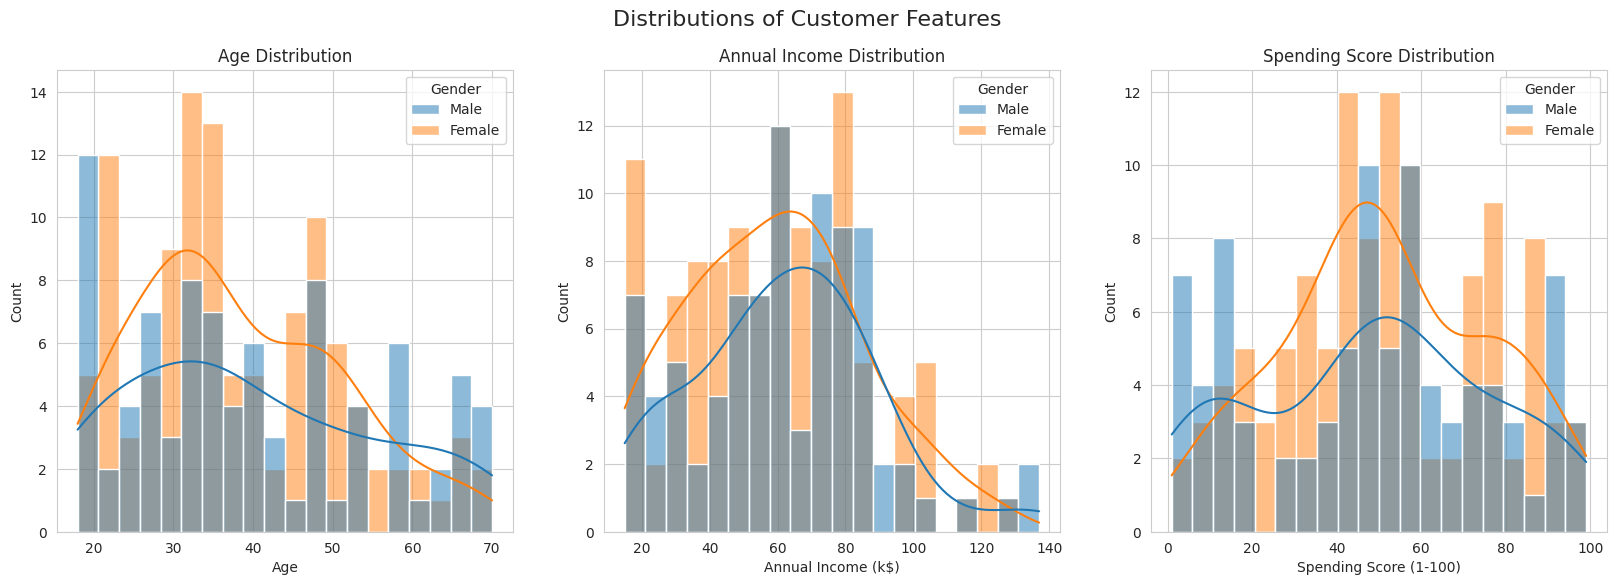

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.show()

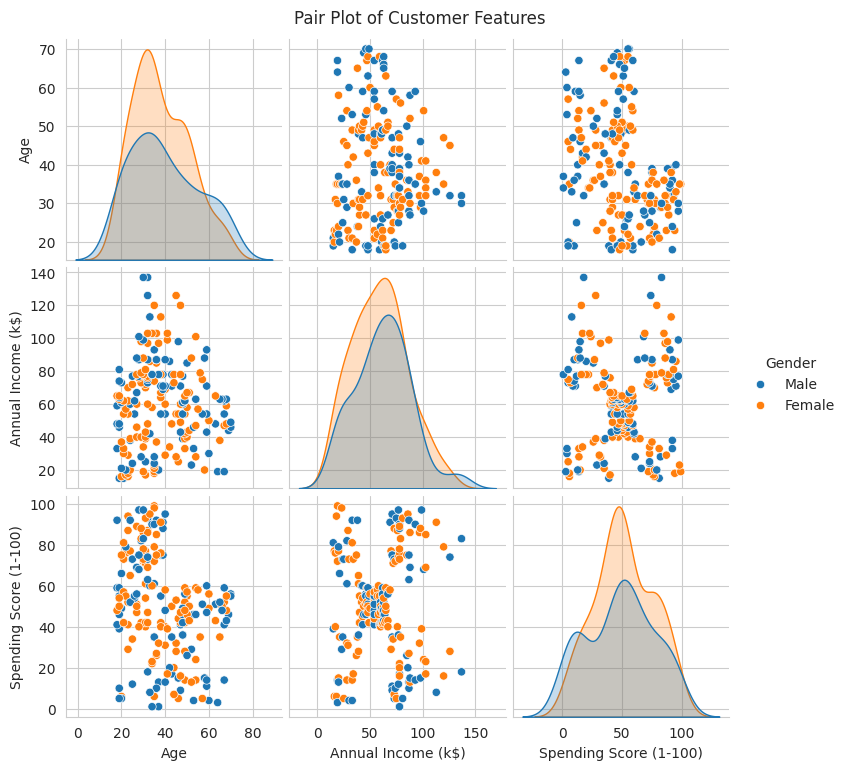

In [5]:
# Using pairplot to visualize relationships between all numerical variables
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

In [6]:
fig = px.scatter_3d(df,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Age',
                    color='Gender',
                    title='3D View of Customer Data')
fig.show()

### Step 3: Segmentation Model 1 - Income & Spending Score

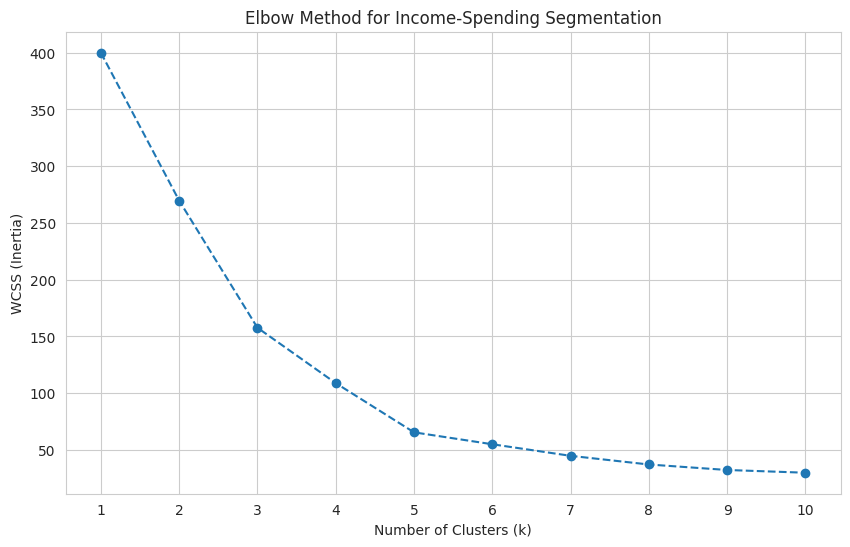

In [7]:
# 1. Select and scale the features
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# 2. Implement the Elbow Method
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

In [8]:
# Build and fit the final model
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X1_scaled)

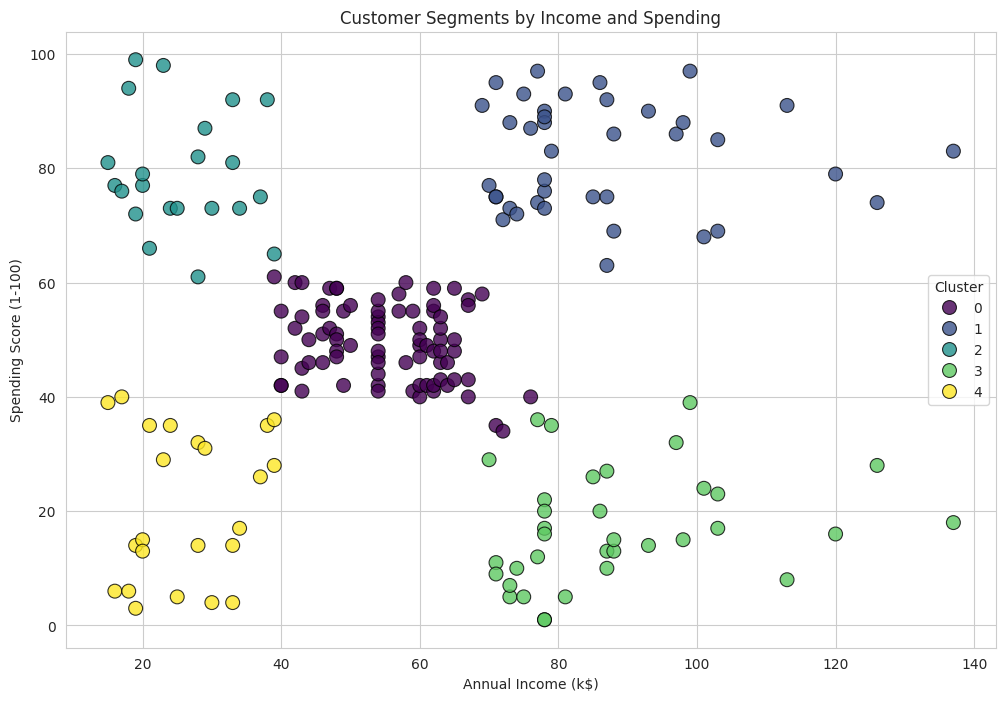

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [10]:
# Quantitative Persona Analysis
cluster_profiles1 = df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_Cluster'].value_counts()
print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


### Step 4: Segmentation Model 2 - Age & Spending Score

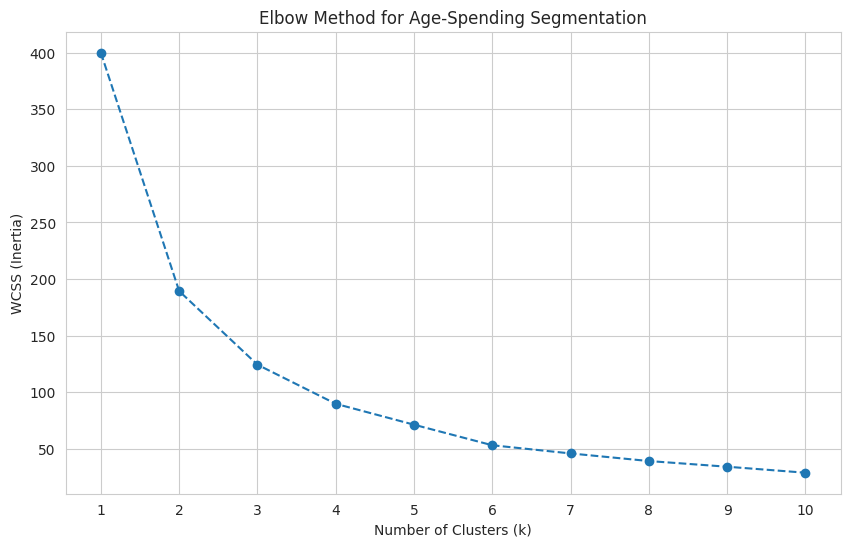

In [11]:
# 1. Select and scale the features
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

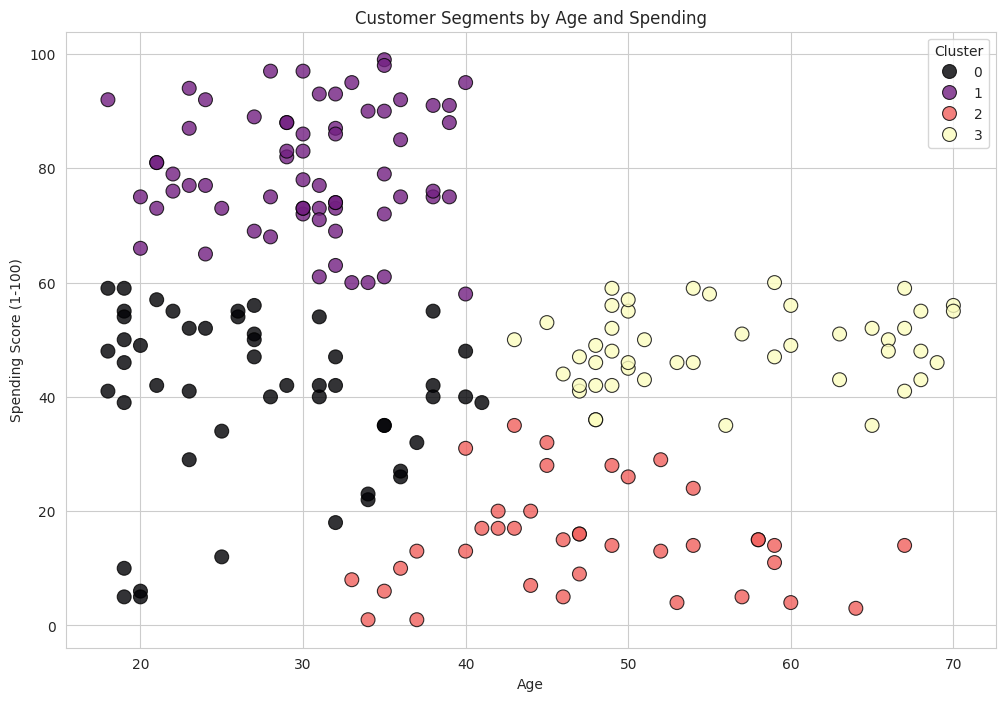

In [12]:
# Build and fit the final model for age segmentation
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

# Visualize the new clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

### Step 5: An Alternative Method - Hierarchical Clustering

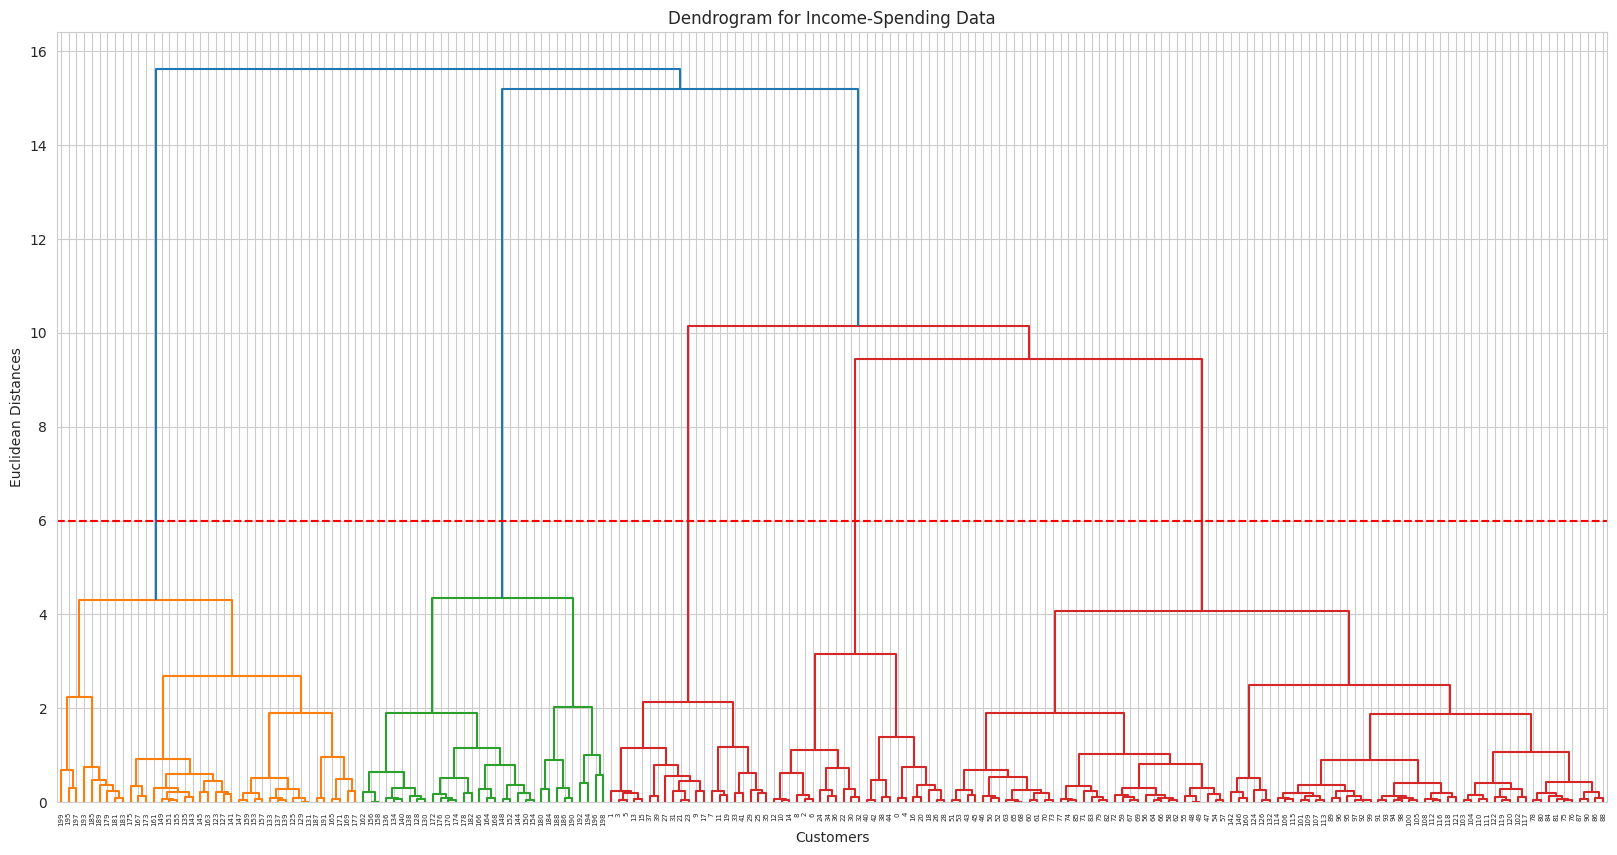

In [13]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X1_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--') # Example cut-off line
plt.show()

## Assignment Submission Criteria:

### 1. Gender vs. Spending Score Analysis
- Analyze relationship between 'Gender' and 'Spending Score (1-100)'
- Determine if gender plays significant role in spending habits
- Include visualizations and summary statistics

### 2. Feature Engineering for Clustering
- Create new feature using existing data (Feature Engineering)
- Explore clustering with engineered feature + existing features
- Document feature engineering process
- Determine optimal number of clusters (Elbow Method)
- Provide cluster visualization and interpretation

---
# PART 1: GENDER vs SPENDING SCORE ANALYSIS
**Submission Criteria 1:** Analyze the relationship between 'Gender' and 'Spending Score (1-100)' to see if gender plays a significant role in spending habits.

In [15]:
print("=" * 70)
print("           PART 1: GENDER vs SPENDING SCORE ANALYSIS")
print("=" * 70)

# 1. Basic Statistics by Gender
print("\n1. BASIC STATISTICS BY GENDER:")
print("-" * 40)
gender_spending_stats = df.groupby('Gender')['Spending Score (1-100)'].describe()
print(gender_spending_stats)

# 2. Gender Distribution
print("\n2. GENDER DISTRIBUTION:")
print("-" * 25)
gender_counts = df['Gender'].value_counts()
gender_percentages = df['Gender'].value_counts(normalize=True) * 100
print(f"Male: {gender_counts['Male']} customers ({gender_percentages['Male']:.1f}%)")
print(f"Female: {gender_counts['Female']} customers ({gender_percentages['Female']:.1f}%)")

# 3. Statistical Significance Test
print("\n3. STATISTICAL SIGNIFICANCE TEST (T-TEST):")
print("-" * 45)
male_spending = df[df['Gender'] == 'Male']['Spending Score (1-100)']
female_spending = df[df['Gender'] == 'Female']['Spending Score (1-100)']

# Import stats from scipy
from scipy import stats

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(male_spending, female_spending)

print(f"Male Spending - Mean: {male_spending.mean():.2f}, Std: {male_spending.std():.2f}")
print(f"Female Spending - Mean: {female_spending.mean():.2f}, Std: {female_spending.std():.2f}")
print(f"Difference in means: {abs(male_spending.mean() - female_spending.mean()):.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Statistically significant (p < 0.05): {'YES' if p_value < 0.05 else 'NO'}")

           PART 1: GENDER vs SPENDING SCORE ANALYSIS

1. BASIC STATISTICS BY GENDER:
----------------------------------------
        count       mean       std  min   25%   50%   75%   max
Gender                                                         
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0

2. GENDER DISTRIBUTION:
-------------------------
Male: 88 customers (44.0%)
Female: 112 customers (56.0%)

3. STATISTICAL SIGNIFICANCE TEST (T-TEST):
---------------------------------------------
Male Spending - Mean: 48.51, Std: 27.90
Female Spending - Mean: 51.53, Std: 24.11
Difference in means: 3.02
T-statistic: -0.8190
P-value: 0.4137
Statistically significant (p < 0.05): NO


/tmp/ipython-input-2912193770.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2912193770.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




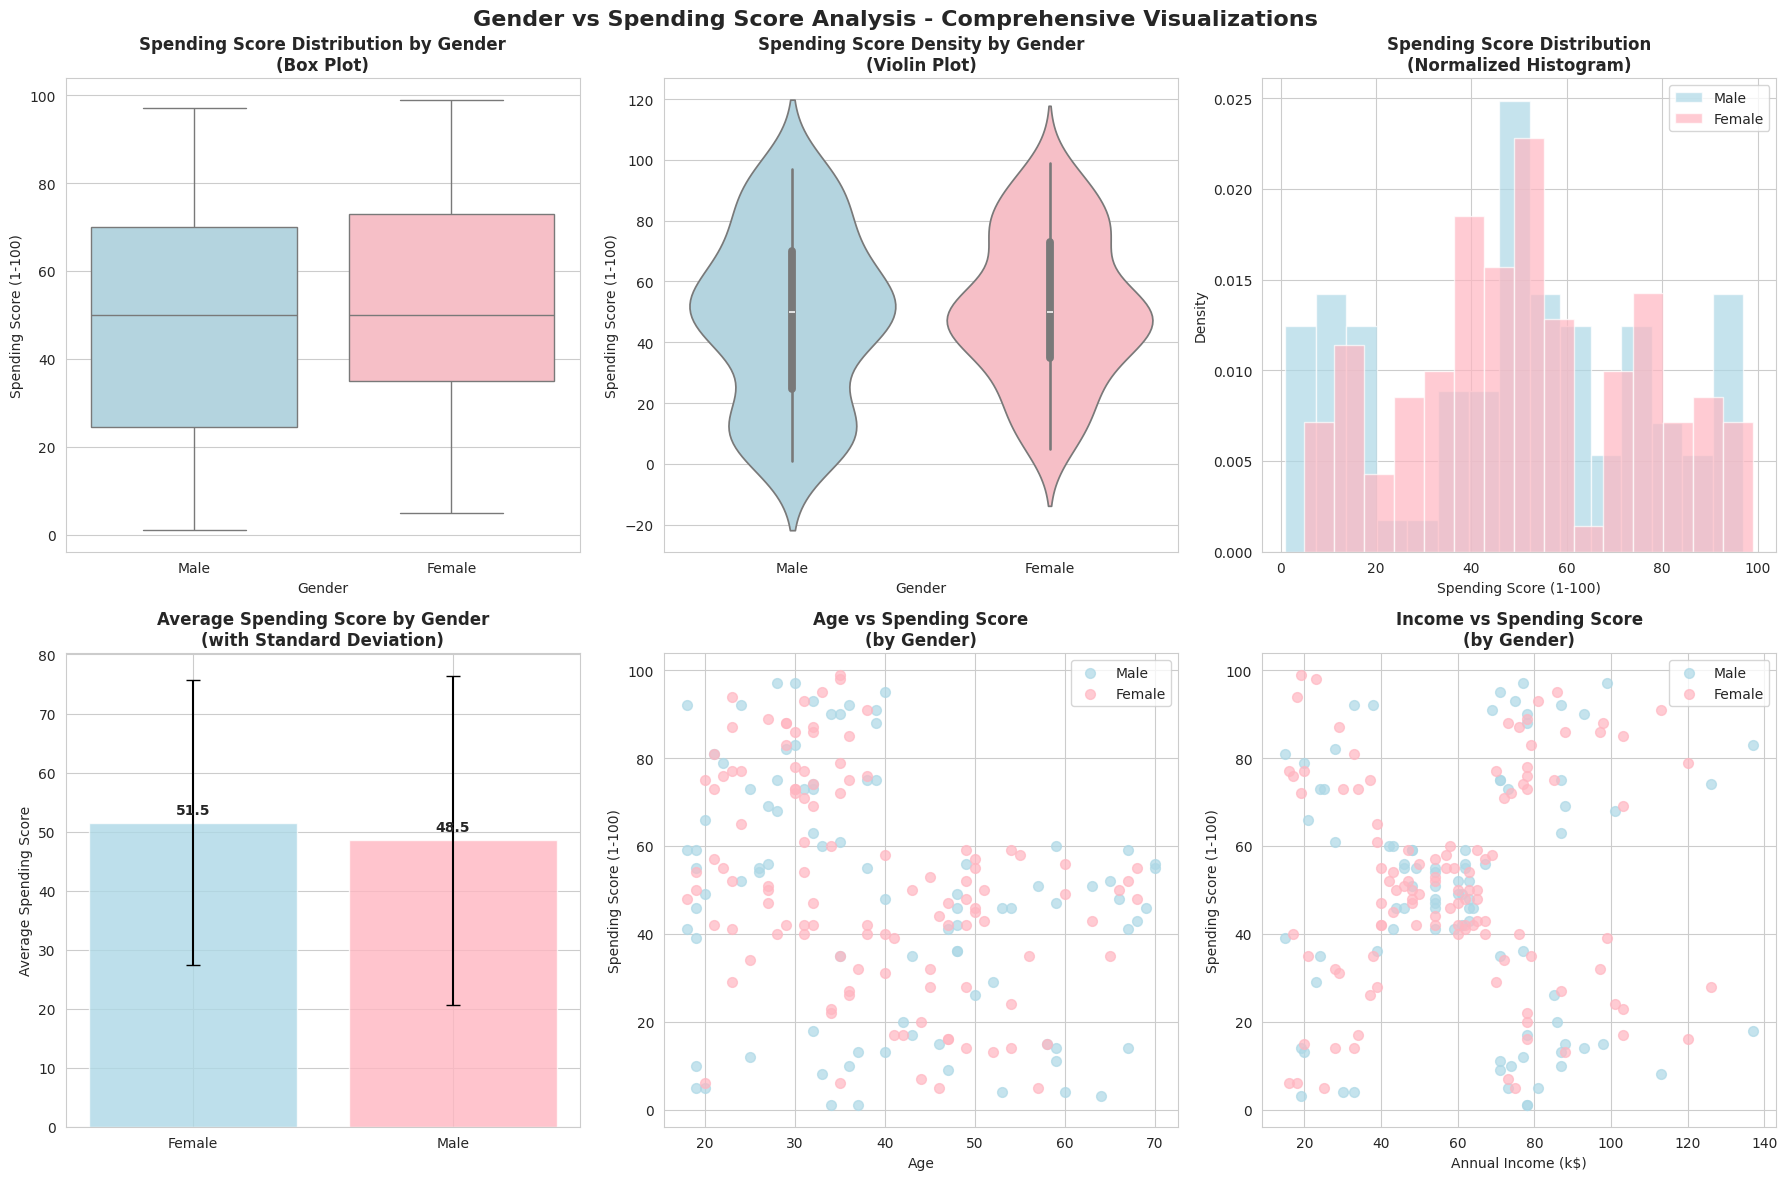

In [16]:
# Comprehensive Visualizations for Gender vs Spending Score
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Gender vs Spending Score Analysis - Comprehensive Visualizations', fontsize=16, fontweight='bold')

# 1. Box plot
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', ax=axes[0,0],
            palette=['lightblue', 'lightpink'])
axes[0,0].set_title('Spending Score Distribution by Gender\n(Box Plot)', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Spending Score (1-100)')

# 2. Violin plot
sns.violinplot(data=df, x='Gender', y='Spending Score (1-100)', ax=axes[0,1],
               palette=['lightblue', 'lightpink'])
axes[0,1].set_title('Spending Score Density by Gender\n(Violin Plot)', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Spending Score (1-100)')

# 3. Histogram comparison
axes[0,2].hist(male_spending, alpha=0.7, label='Male', bins=15, color='lightblue', density=True)
axes[0,2].hist(female_spending, alpha=0.7, label='Female', bins=15, color='lightpink', density=True)
axes[0,2].set_title('Spending Score Distribution\n(Normalized Histogram)', fontsize=12, fontweight='bold')
axes[0,2].set_xlabel('Spending Score (1-100)')
axes[0,2].set_ylabel('Density')
axes[0,2].legend()

# 4. Mean comparison bar plot
gender_means = df.groupby('Gender')['Spending Score (1-100)'].mean()
gender_std = df.groupby('Gender')['Spending Score (1-100)'].std()
bars = axes[1,0].bar(gender_means.index, gender_means.values,
                     color=['lightblue', 'lightpink'], alpha=0.8,
                     yerr=gender_std.values, capsize=5)
axes[1,0].set_title('Average Spending Score by Gender\n(with Standard Deviation)', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Average Spending Score')

# Add value labels on bars
for bar, value in zip(bars, gender_means.values):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                   f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 5. Scatter plot: Age vs Spending Score colored by Gender
for gender, color in [('Male', 'lightblue'), ('Female', 'lightpink')]:
    gender_data = df[df['Gender'] == gender]
    axes[1,1].scatter(gender_data['Age'], gender_data['Spending Score (1-100)'],
                      c=color, label=gender, alpha=0.7, s=50)
axes[1,1].set_title('Age vs Spending Score\n(by Gender)', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('Spending Score (1-100)')
axes[1,1].legend()

# 6. Income vs Spending Score colored by Gender
for gender, color in [('Male', 'lightblue'), ('Female', 'lightpink')]:
    gender_data = df[df['Gender'] == gender]
    axes[1,2].scatter(gender_data['Annual Income (k$)'], gender_data['Spending Score (1-100)'],
                      c=color, label=gender, alpha=0.7, s=50)
axes[1,2].set_title('Income vs Spending Score\n(by Gender)', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('Annual Income (k$)')
axes[1,2].set_ylabel('Spending Score (1-100)')
axes[1,2].legend()

plt.tight_layout()
plt.show()

In [17]:
# Additional Statistical Analysis
print("\n4. ADDITIONAL STATISTICAL ANALYSIS:")
print("-" * 40)

# Mann-Whitney U test (non-parametric alternative)
u_stat, u_p_value = stats.mannwhitneyu(male_spending, female_spending, alternative='two-sided')
print(f"Mann-Whitney U test p-value: {u_p_value:.4f}")

# Effect size (Cohen's d)
pooled_std = np.sqrt(((len(male_spending) - 1) * male_spending.var() +
                      (len(female_spending) - 1) * female_spending.var()) /
                     (len(male_spending) + len(female_spending) - 2))
cohens_d = (male_spending.mean() - female_spending.mean()) / pooled_std
print(f"Cohen's d (effect size): {cohens_d:.4f}")

# Interpret effect size
if abs(cohens_d) < 0.2:
    effect_interpretation = "negligible"
elif abs(cohens_d) < 0.5:
    effect_interpretation = "small"
elif abs(cohens_d) < 0.8:
    effect_interpretation = "medium"
else:
    effect_interpretation = "large"

print(f"Effect size interpretation: {effect_interpretation}")

# Confidence interval for the difference in means
diff_mean = male_spending.mean() - female_spending.mean()
se_diff = np.sqrt(male_spending.var()/len(male_spending) + female_spending.var()/len(female_spending))
ci_lower = diff_mean - 1.96 * se_diff
ci_upper = diff_mean + 1.96 * se_diff
print(f"95% Confidence Interval for difference: [{ci_lower:.2f}, {ci_upper:.2f}]")


4. ADDITIONAL STATISTICAL ANALYSIS:
----------------------------------------
Mann-Whitney U test p-value: 0.5713
Cohen's d (effect size): -0.1167
Effect size interpretation: negligible
95% Confidence Interval for difference: [-10.36, 4.33]


In [18]:
  # PART 1 CONCLUSION - Gender vs Spending Score Analysis
print("\n" + "=" * 70)
print("           PART 1 CONCLUSION: GENDER vs SPENDING SCORE")
print("=" * 70)

male_mean = male_spending.mean()
female_mean = female_spending.mean()
difference = abs(male_mean - female_mean)

print(f"\nKEY FINDINGS:")
print(f"• Male average spending score: {male_mean:.2f}")
print(f"• Female average spending score: {female_mean:.2f}")
print(f"• Absolute difference: {difference:.2f} points")
print(f"• T-test p-value: {p_value:.4f}")
print(f"• Mann-Whitney U p-value: {u_p_value:.4f}")
print(f"• Effect size (Cohen's d): {cohens_d:.4f} ({effect_interpretation})")

if p_value < 0.05:
    print(f"\nCONCLUSION: Gender DOES play a statistically significant role in spending habits.")
    higher_gender = 'Male' if male_mean > female_mean else 'Female'
    print(f"{higher_gender} customers tend to have higher spending scores on average.")
    print(f"However, the effect size is {effect_interpretation}, indicating practical significance may be limited.")
else:
    print(f"\nCONCLUSION: Gender does NOT play a statistically significant role in spending habits.")
    print(f"The difference in spending patterns between genders is not statistically significant.")

print(f"\nBUSINESS IMPLICATIONS:")
if p_value < 0.05 and abs(cohens_d) >= 0.2:
    print(f"• Consider gender-specific marketing strategies")
    print(f"• Tailor product offerings based on gender preferences")
    print(f"• Allocate marketing budget considering gender differences")
else:
    print(f"• Gender-neutral marketing strategies may be more effective")
    print(f"• Focus on other demographic factors for segmentation")
    print(f"• Consider age and income as primary segmentation variables")

print("=" * 70)


           PART 1 CONCLUSION: GENDER vs SPENDING SCORE

KEY FINDINGS:
• Male average spending score: 48.51
• Female average spending score: 51.53
• Absolute difference: 3.02 points
• T-test p-value: 0.4137
• Mann-Whitney U p-value: 0.5713
• Effect size (Cohen's d): -0.1167 (negligible)

CONCLUSION: Gender does NOT play a statistically significant role in spending habits.
The difference in spending patterns between genders is not statistically significant.

BUSINESS IMPLICATIONS:
• Gender-neutral marketing strategies may be more effective
• Focus on other demographic factors for segmentation
• Consider age and income as primary segmentation variables


---
# PART 2: FEATURE ENGINEERING FOR CLUSTERING
**Submission Criteria 2:** Create a new feature using existing data and explore clustering with the engineered feature combined with existing features.

In [19]:
print("=" * 70)
print("           PART 2: FEATURE ENGINEERING FOR CLUSTERING")
print("=" * 70)

# Create a copy of the dataframe for feature engineering
df_engineered = df.copy()

print("\n1. FEATURE ENGINEERING PROCESS:")
print("-" * 40)

# Feature 1: Income-to-Spending Ratio
df_engineered['Income_Spending_Ratio'] = df_engineered['Annual Income (k$)'] / df_engineered['Spending Score (1-100)']
print("✓ Income-to-Spending Ratio: Annual Income / Spending Score")
print("  - Higher values = high income, low spending (conservative spenders)")
print("  - Lower values = high spending relative to income (big spenders)")

# Feature 2: Age Group Categories (encoded as numerical)
def categorize_age_numeric(age):
    if age < 25:
        return 1  # Young
    elif age < 40:
        return 2  # Adult
    elif age < 60:
        return 3  # Middle-aged
    else:
        return 4  # Senior

df_engineered['Age_Group_Numeric'] = df_engineered['Age'].apply(categorize_age_numeric)
print("\n✓ Age Group (Numeric): 1=Young(18-24), 2=Adult(25-39), 3=Middle-aged(40-59), 4=Senior(60+)")

# Feature 3: Customer Value Score (weighted combination)
# Normalize features to 0-1 scale
income_normalized = (df_engineered['Annual Income (k$)'] - df_engineered['Annual Income (k$)'].min()) / (df_engineered['Annual Income (k$)'].max() - df_engineered['Annual Income (k$)'].min())
spending_normalized = (df_engineered['Spending Score (1-100)'] - df_engineered['Spending Score (1-100)'].min()) / (df_engineered['Spending Score (1-100)'].max() - df_engineered['Spending Score (1-100)'].min())

# Customer Value = 0.6 * Income + 0.4 * Spending (weighted towards income)
df_engineered['Customer_Value_Score'] = 0.6 * income_normalized + 0.4 * spending_normalized
print("\n✓ Customer Value Score: 0.6 × Normalized_Income + 0.4 × Normalized_Spending")
print("  - Range: 0-1, where 1 represents highest value customers")

# Feature 4: Spending Efficiency (spending per dollar of income)
df_engineered['Spending_Efficiency'] = df_engineered['Spending Score (1-100)'] / df_engineered['Annual Income (k$)']
print("\n✓ Spending Efficiency: Spending Score / Annual Income")
print("  - Higher values = more spending per dollar earned")

# Feature 5: Gender encoded numerically
df_engineered['Gender_Numeric'] = df_engineered['Gender'].map({'Male': 0, 'Female': 1})
print("\n✓ Gender (Numeric): 0=Male, 1=Female")

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Engineered dataset shape: {df_engineered.shape}")
print(f"New features created: {df_engineered.shape[1] - df.shape[1]}")

# Display new features statistics
new_features = ['Income_Spending_Ratio', 'Age_Group_Numeric', 'Customer_Value_Score',
                'Spending_Efficiency', 'Gender_Numeric']
print("\nNew Features Statistics:")
print(df_engineered[new_features].describe())

           PART 2: FEATURE ENGINEERING FOR CLUSTERING

1. FEATURE ENGINEERING PROCESS:
----------------------------------------
✓ Income-to-Spending Ratio: Annual Income / Spending Score
  - Higher values = high income, low spending (conservative spenders)
  - Lower values = high spending relative to income (big spenders)

✓ Age Group (Numeric): 1=Young(18-24), 2=Adult(25-39), 3=Middle-aged(40-59), 4=Senior(60+)

✓ Customer Value Score: 0.6 × Normalized_Income + 0.4 × Normalized_Spending
  - Range: 0-1, where 1 represents highest value customers

✓ Spending Efficiency: Spending Score / Annual Income
  - Higher values = more spending per dollar earned

✓ Gender (Numeric): 0=Male, 1=Female

Original dataset shape: (200, 6)
Engineered dataset shape: (200, 11)
New features created: 5

New Features Statistics:
       Income_Spending_Ratio  Age_Group_Numeric  Customer_Value_Score  \
count             200.000000         200.000000            200.000000   
mean                2.824117         


2. VISUALIZING ENGINEERED FEATURES:
----------------------------------------


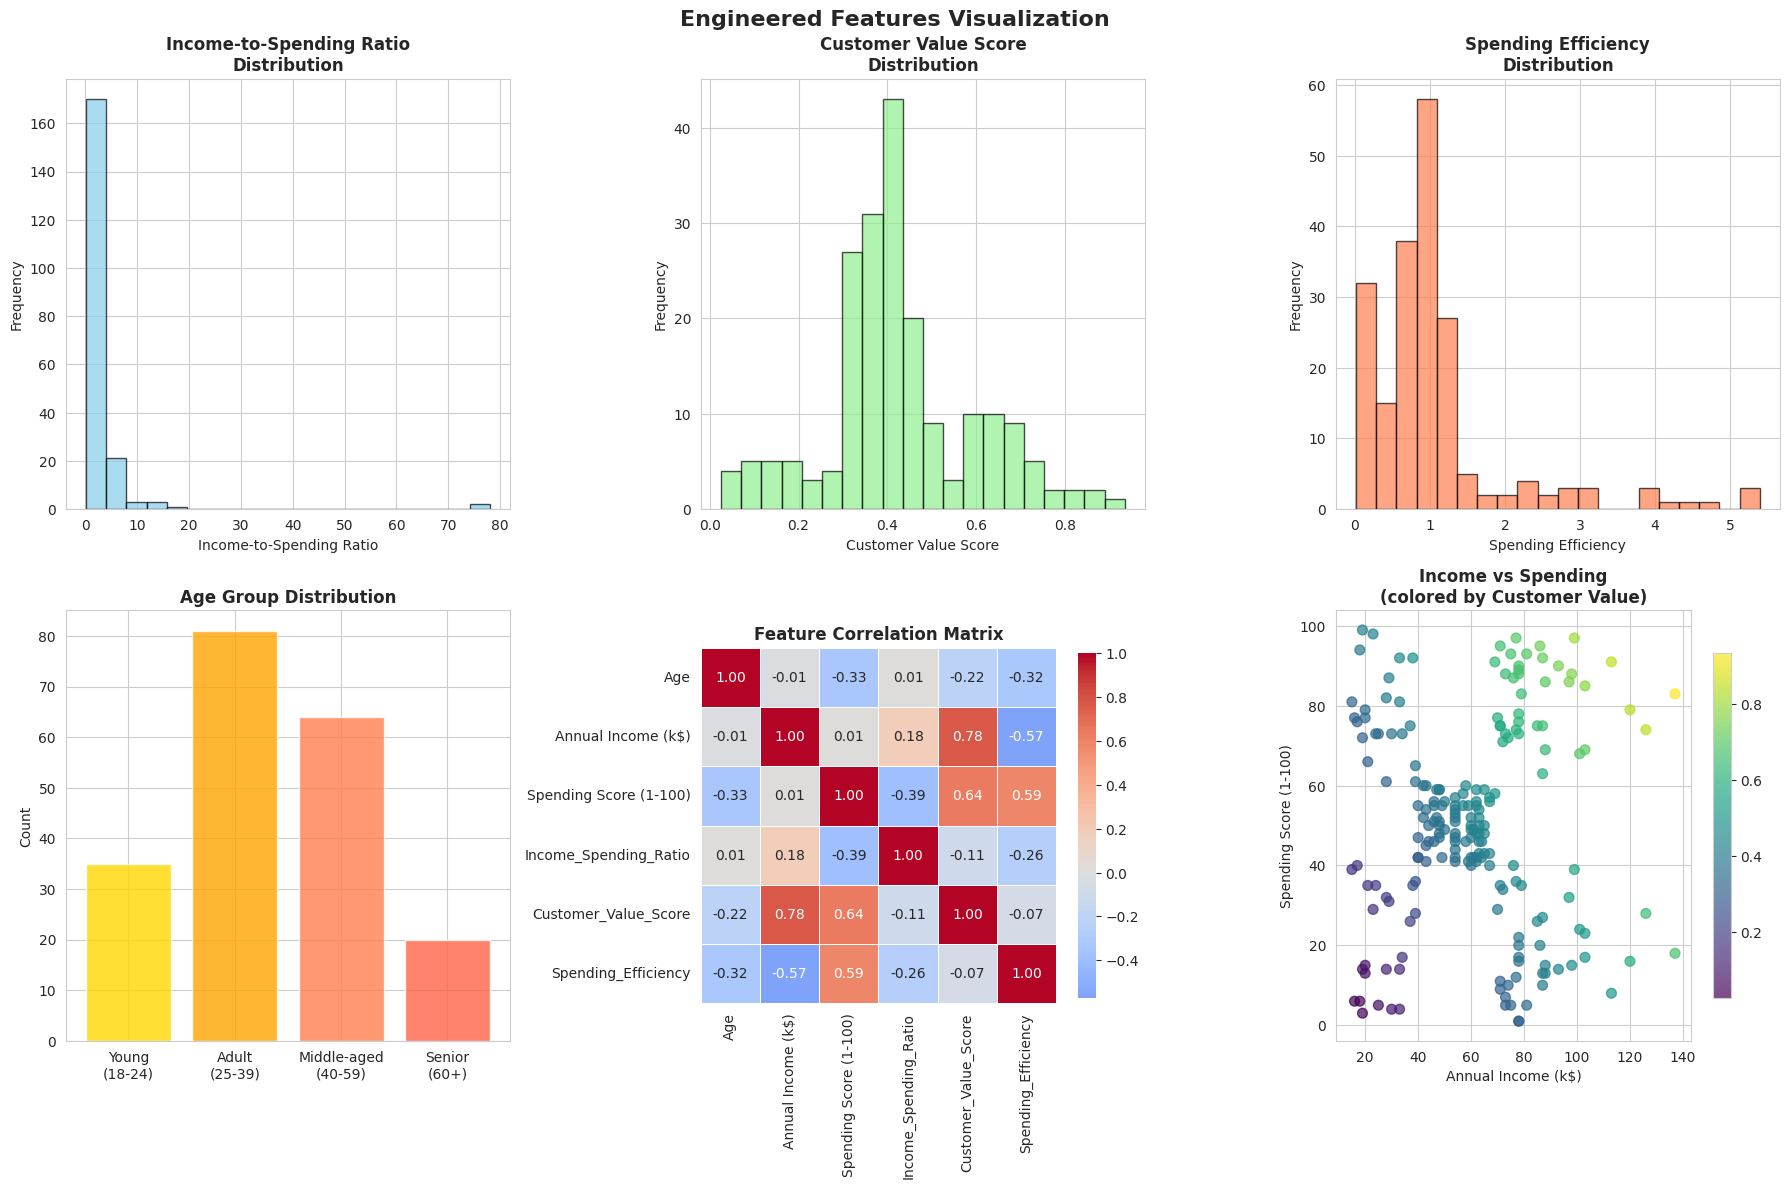

In [20]:
# Visualize engineered features
print("\n2. VISUALIZING ENGINEERED FEATURES:")
print("-" * 40)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Engineered Features Visualization', fontsize=16, fontweight='bold')

# 1. Income-Spending Ratio distribution
axes[0,0].hist(df_engineered['Income_Spending_Ratio'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Income-to-Spending Ratio\nDistribution', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Income-to-Spending Ratio')
axes[0,0].set_ylabel('Frequency')

# 2. Customer Value Score distribution
axes[0,1].hist(df_engineered['Customer_Value_Score'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Customer Value Score\nDistribution', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Customer Value Score')
axes[0,1].set_ylabel('Frequency')

# 3. Spending Efficiency distribution
axes[0,2].hist(df_engineered['Spending_Efficiency'], bins=20, alpha=0.7, color='coral', edgecolor='black')
axes[0,2].set_title('Spending Efficiency\nDistribution', fontsize=12, fontweight='bold')
axes[0,2].set_xlabel('Spending Efficiency')
axes[0,2].set_ylabel('Frequency')

# 4. Age Group distribution
age_group_counts = df_engineered['Age_Group_Numeric'].value_counts().sort_index()
age_labels = ['Young\n(18-24)', 'Adult\n(25-39)', 'Middle-aged\n(40-59)', 'Senior\n(60+)']
axes[1,0].bar(age_group_counts.index, age_group_counts.values,
              color=['gold', 'orange', 'coral', 'tomato'], alpha=0.8)
axes[1,0].set_title('Age Group Distribution', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Count')
axes[1,0].set_xticks(age_group_counts.index)
axes[1,0].set_xticklabels(age_labels)

# 5. Correlation heatmap of all features
correlation_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
                       'Income_Spending_Ratio', 'Customer_Value_Score', 'Spending_Efficiency']
corr_matrix = df_engineered[correlation_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1],
            square=True, linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})
axes[1,1].set_title('Feature Correlation Matrix', fontsize=12, fontweight='bold')

# 6. Scatter plot: Income vs Spending colored by Customer Value Score
scatter = axes[1,2].scatter(df_engineered['Annual Income (k$)'], df_engineered['Spending Score (1-100)'],
                           c=df_engineered['Customer_Value_Score'], cmap='viridis', alpha=0.7, s=50)
axes[1,2].set_title('Income vs Spending\n(colored by Customer Value)', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('Annual Income (k$)')
axes[1,2].set_ylabel('Spending Score (1-100)')
plt.colorbar(scatter, ax=axes[1,2], shrink=0.8)

plt.tight_layout()
plt.show()

In [21]:
# Prepare features for clustering
print("\n3. PREPARING FEATURES FOR CLUSTERING:")
print("-" * 45)

# Select features for clustering (including engineered features)
clustering_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
                      'Income_Spending_Ratio', 'Customer_Value_Score', 'Spending_Efficiency']

print(f"Selected features for clustering: {clustering_features}")

# Create feature matrix
X = df_engineered[clustering_features].copy()
print(f"Feature matrix shape: {X.shape}")

# Check for any infinite or NaN values
print(f"\nData quality check:")
print(f"NaN values: {X.isnull().sum().sum()}")
print(f"Infinite values: {np.isinf(X).sum().sum()}")

# Replace any infinite values with NaN and then fill with median
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

# Standardize features (crucial for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=clustering_features)

print(f"\nFeatures standardized successfully.")
print(f"Standardized features shape: {X_scaled.shape}")
print("\nStandardized features statistics (should be ~0 mean, ~1 std):")
print(X_scaled_df.describe())


3. PREPARING FEATURES FOR CLUSTERING:
---------------------------------------------
Selected features for clustering: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income_Spending_Ratio', 'Customer_Value_Score', 'Spending_Efficiency']
Feature matrix shape: (200, 6)

Data quality check:
NaN values: 0
Infinite values: 0

Features standardized successfully.
Standardized features shape: (200, 6)

Standardized features statistics (should be ~0 mean, ~1 std):
                Age  Annual Income (k$)  Spending Score (1-100)  \
count  2.000000e+02        2.000000e+02            2.000000e+02   
mean  -1.021405e-16       -2.131628e-16           -1.465494e-16   
std    1.002509e+00        1.002509e+00            1.002509e+00   
min   -1.496335e+00       -1.738999e+00           -1.910021e+00   
25%   -7.248436e-01       -7.275093e-01           -5.997931e-01   
50%   -2.045351e-01        3.587926e-02           -7.764312e-03   
75%    7.284319e-01        6.656748e-01            8.851316e-

In [23]:
# Determine optimal number of clusters using Elbow Method and Silhouette Analysis
print("\n4. DETERMINING OPTIMAL NUMBER OF CLUSTERS:")
print("-" * 50)

# Calculate metrics for different k values
k_range = range(1, 11)
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []
inertias = []

print("Computing clustering metrics for k = 1 to 10...")

# Import silhouette_score
from sklearn.metrics import silhouette_score

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)

    wcss.append(kmeans.inertia_)
    inertias.append(kmeans.inertia_)

    # Calculate silhouette score (skip k=1 as it's undefined)
    if k > 1:
        sil_score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(sil_score)
        print(f"k={k}: WCSS={kmeans.inertia_:.2f}, Silhouette Score={sil_score:.3f}")
    else:
        silhouette_scores.append(0)
        print(f"k={k}: WCSS={kmeans.inertia_:.2f}")

# Find optimal k based on highest silhouette score
optimal_k_silhouette = silhouette_scores[1:].index(max(silhouette_scores[1:])) + 2
max_silhouette = max(silhouette_scores[1:])

print(f"\nOptimal k based on Silhouette Score: {optimal_k_silhouette}")
print(f"Maximum Silhouette Score: {max_silhouette:.3f}")


4. DETERMINING OPTIMAL NUMBER OF CLUSTERS:
--------------------------------------------------
Computing clustering metrics for k = 1 to 10...
k=1: WCSS=1200.00
k=2: WCSS=888.53, Silhouette Score=0.287
k=3: WCSS=678.74, Silhouette Score=0.351
k=4: WCSS=497.10, Silhouette Score=0.381
k=5: WCSS=382.09, Silhouette Score=0.360
k=6: WCSS=291.33, Silhouette Score=0.395
k=7: WCSS=216.18, Silhouette Score=0.441
k=8: WCSS=191.83, Silhouette Score=0.435
k=9: WCSS=176.51, Silhouette Score=0.432
k=10: WCSS=157.14, Silhouette Score=0.382

Optimal k based on Silhouette Score: 7
Maximum Silhouette Score: 0.441


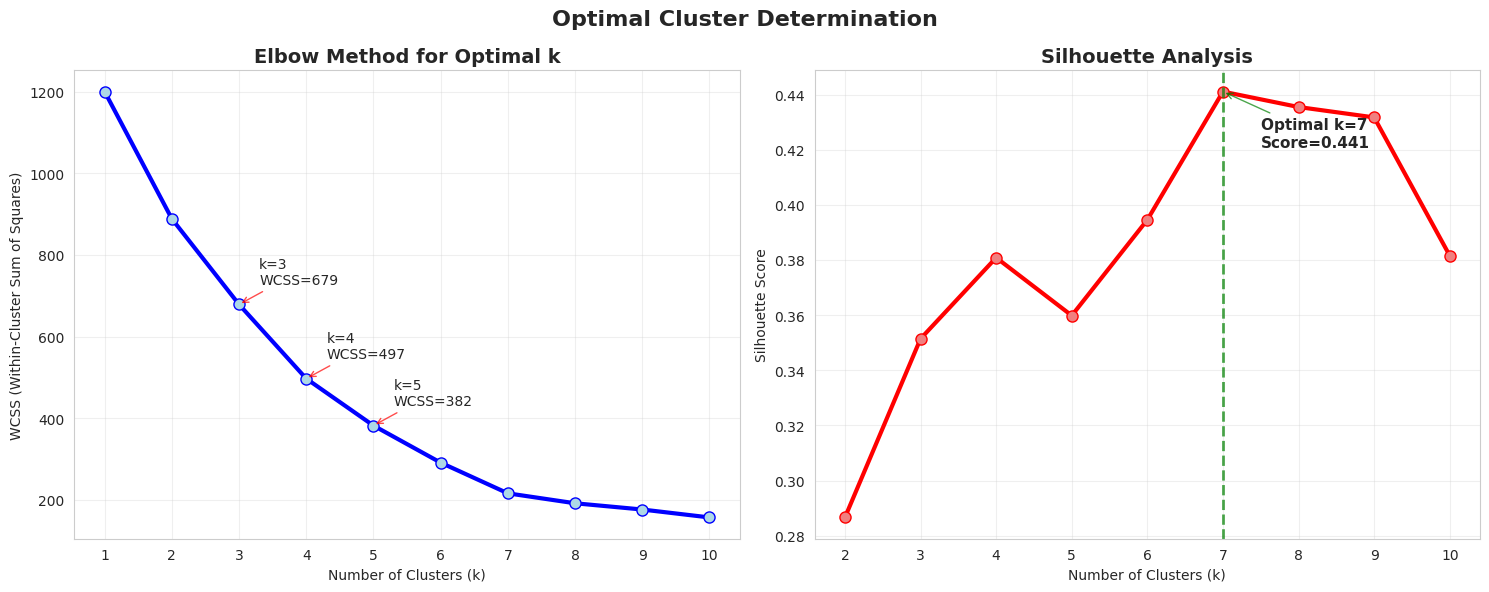


Elbow Method Analysis:
• Look for the 'elbow' point where WCSS reduction slows down
• Common elbow points appear around k=3, k=4, or k=5

Silhouette Analysis:
• Higher silhouette scores indicate better cluster separation
• Optimal k based on silhouette score: 7
• This suggests 7 clusters provide the best separation


In [25]:
# Plot Elbow Method and Silhouette Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Optimal Cluster Determination', fontsize=16, fontweight='bold')

# Elbow Method plot
axes[0].plot(k_range, wcss, 'bo-', linewidth=3, markersize=8, markerfacecolor='lightblue')
axes[0].set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('WCSS (Within-Cluster Sum of Squares)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

# Add annotations for key points
for i, (k, wcss_val) in enumerate(zip(k_range, wcss)):
    if k in [3, 4, 5]:  # Highlight potential elbow points
        axes[0].annotate(f'k={k}\nWCSS={wcss_val:.0f}',
                        xy=(k, wcss_val), xytext=(k+0.3, wcss_val+50),
                        arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                        fontsize=10, ha='left')

# Silhouette Score plot
k_range_sil = list(range(2, 11))
axes[1].plot(k_range_sil, silhouette_scores[1:], 'ro-', linewidth=3, markersize=8, markerfacecolor='lightcoral')
axes[1].set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range_sil)

# Highlight optimal k
axes[1].axvline(x=optimal_k_silhouette, color='green', linestyle='--', alpha=0.7, linewidth=2)
axes[1].annotate(f'Optimal k={optimal_k_silhouette}\nScore={max_silhouette:.3f}',
                xy=(optimal_k_silhouette, max_silhouette),
                xytext=(optimal_k_silhouette+0.5, max_silhouette-0.02),
                arrowprops=dict(arrowstyle='->', color='green', alpha=0.7),
                fontsize=11, ha='left', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nElbow Method Analysis:")
print(f"• Look for the 'elbow' point where WCSS reduction slows down")
print(f"• Common elbow points appear around k=3, k=4, or k=5")
print(f"\nSilhouette Analysis:")
print(f"• Higher silhouette scores indicate better cluster separation")
print(f"• Optimal k based on silhouette score: {optimal_k_silhouette}")
print(f"• This suggests {optimal_k_silhouette} clusters provide the best separation")

In [26]:
# Apply K-Means clustering with optimal k
print("\n5. APPLYING K-MEANS CLUSTERING:")
print("-" * 40)

# Use the optimal k from silhouette analysis
optimal_k = optimal_k_silhouette
print(f"Using k = {optimal_k} clusters")

# Fit K-means with optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
cluster_labels = kmeans_optimal.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df_clustered = df_engineered.copy()
df_clustered['Cluster'] = cluster_labels

print(f"Clustering completed successfully!")
print(f"Final silhouette score: {silhouette_score(X_scaled, cluster_labels):.3f}")
print(f"Final WCSS: {kmeans_optimal.inertia_:.2f}")

# Cluster distribution
print(f"\nCluster Distribution:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"Cluster {cluster_id}: {count} customers ({percentage:.1f}%)")

# Cluster centers (in original scale)
cluster_centers_scaled = kmeans_optimal.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=clustering_features)
cluster_centers_df.index = [f'Cluster {i}' for i in range(optimal_k)]

print(f"\nCluster Centers (Original Scale):")
print(cluster_centers_df.round(2))


5. APPLYING K-MEANS CLUSTERING:
----------------------------------------
Using k = 7 clusters
Clustering completed successfully!
Final silhouette score: 0.441
Final WCSS: 216.18

Cluster Distribution:
Cluster 0: 39 customers (19.5%)
Cluster 1: 46 customers (23.0%)
Cluster 2: 39 customers (19.5%)
Cluster 3: 2 customers (1.0%)
Cluster 4: 23 customers (11.5%)
Cluster 5: 32 customers (16.0%)
Cluster 6: 19 customers (9.5%)

Cluster Centers (Original Scale):
             Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster 0  26.92               56.21                   49.54   
Cluster 1  56.15               53.93                   48.78   
Cluster 2  32.69               86.54                   82.13   
Cluster 3  35.50               78.00                    1.00   
Cluster 4  25.30               24.30                   76.52   
Cluster 5  41.62               89.16                   17.75   
Cluster 6  46.16               26.11                   17.42   

           Income_Spending_Ra


6. CLUSTER VISUALIZATION AND INTERPRETATION:
-------------------------------------------------------


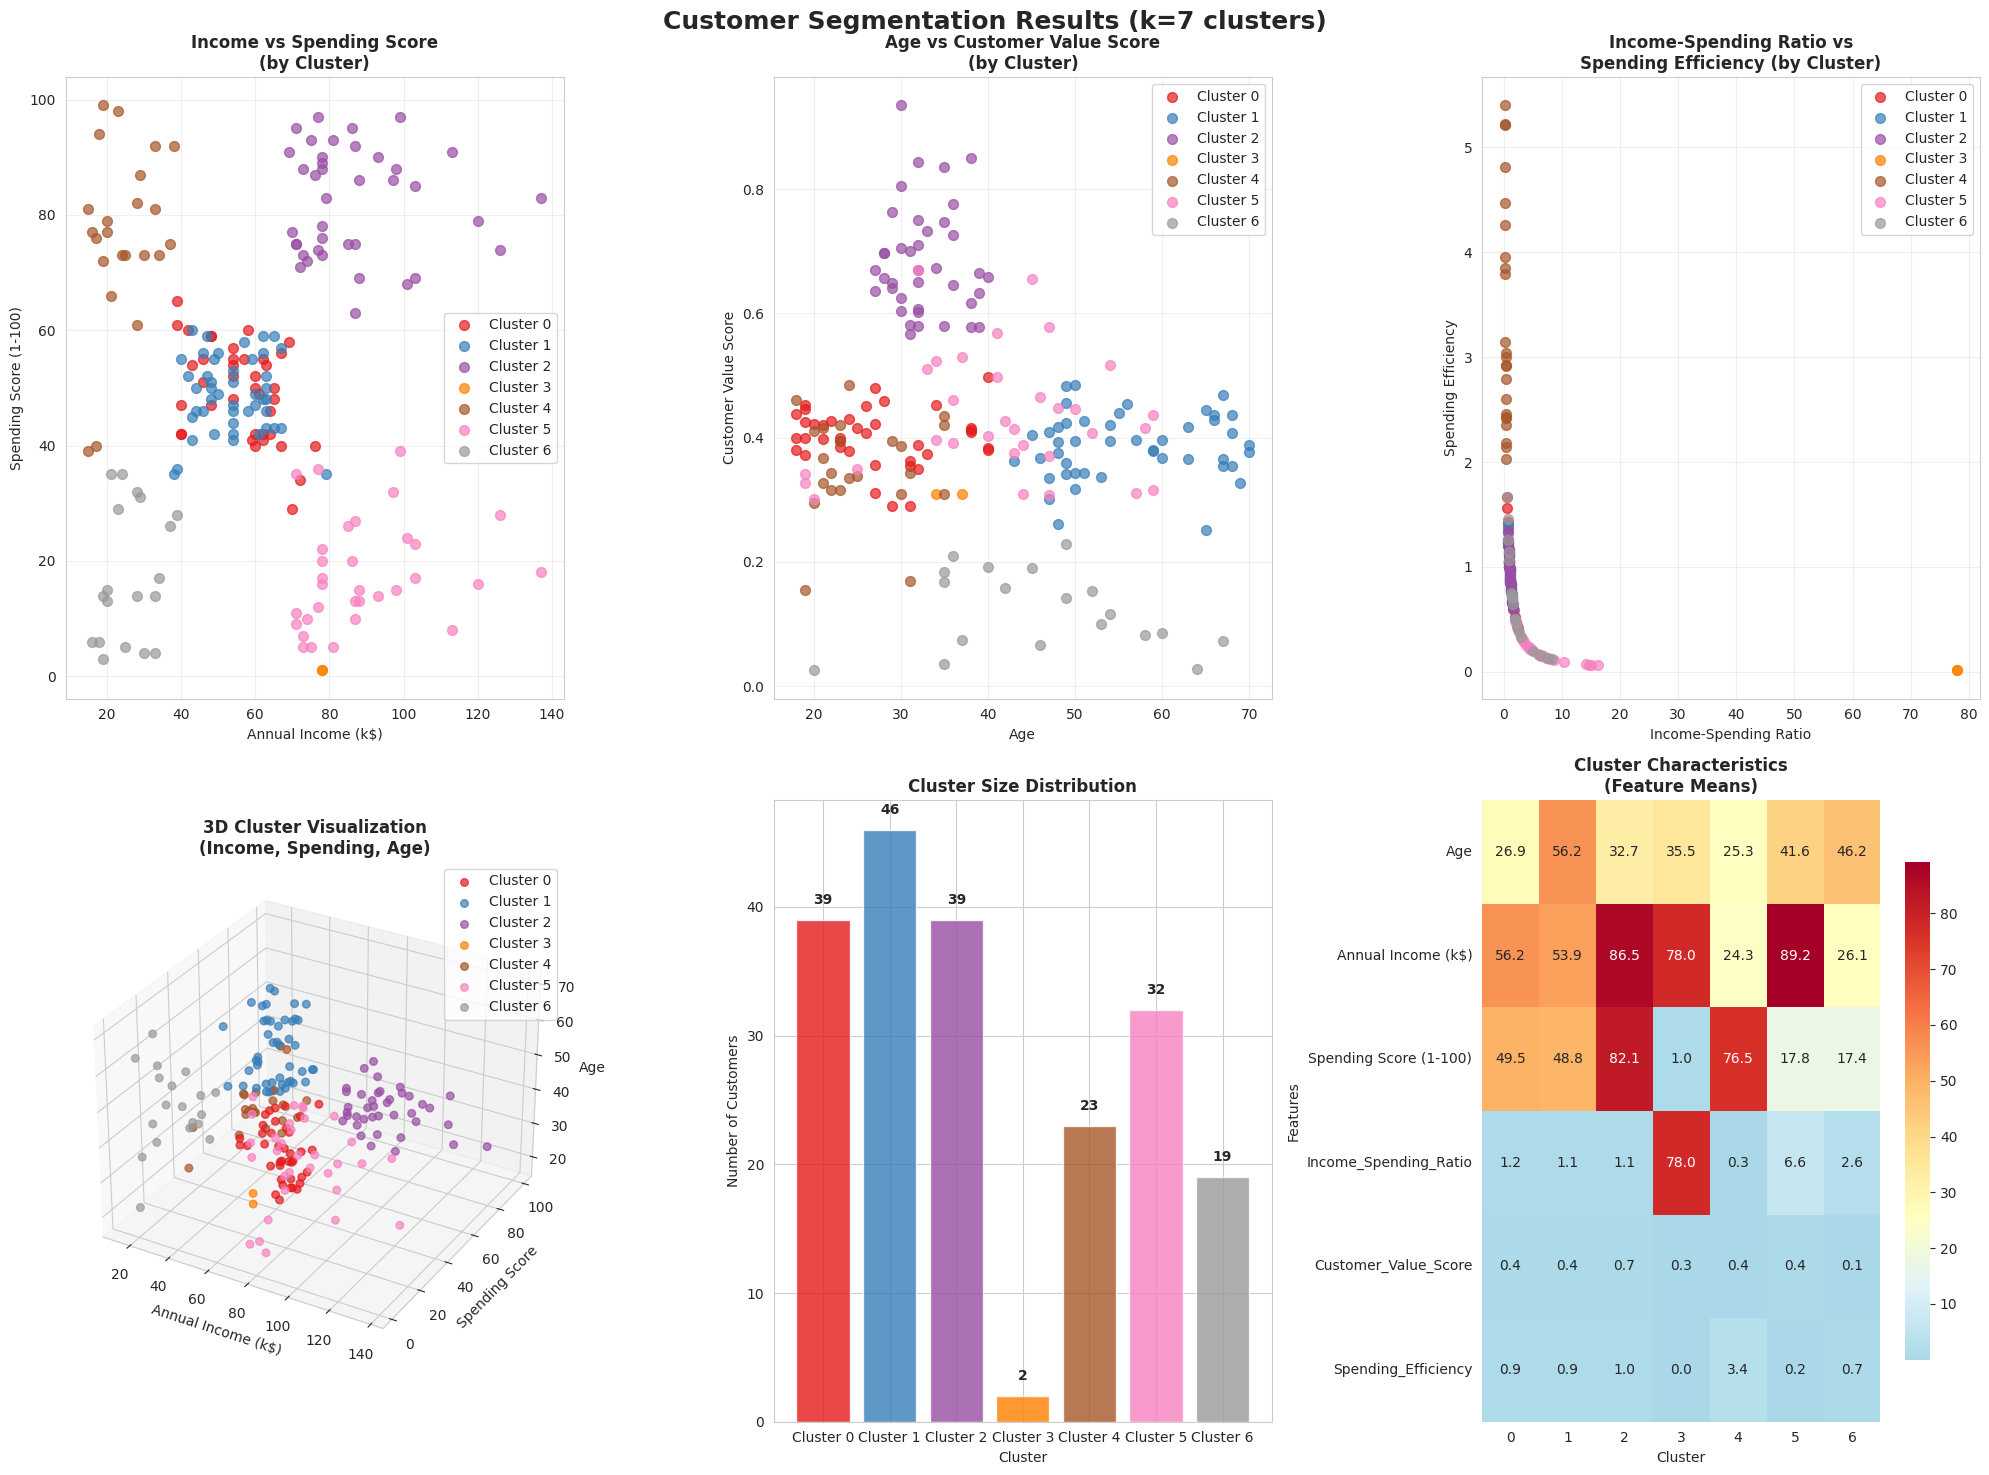

In [27]:
# Comprehensive Cluster Visualization
print("\n6. CLUSTER VISUALIZATION AND INTERPRETATION:")
print("-" * 55)

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 15))
fig.suptitle(f'Customer Segmentation Results (k={optimal_k} clusters)', fontsize=18, fontweight='bold')

# Define colors for clusters
colors = plt.cm.Set1(np.linspace(0, 1, optimal_k))

# 1. Income vs Spending Score (2D)
ax1 = plt.subplot(2, 3, 1)
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               c=[colors[i]], label=f'Cluster {i}', alpha=0.7, s=50)
plt.title('Income vs Spending Score\n(by Cluster)', fontsize=12, fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Age vs Customer Value Score
ax2 = plt.subplot(2, 3, 2)
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['Customer_Value_Score'],
               c=[colors[i]], label=f'Cluster {i}', alpha=0.7, s=50)
plt.title('Age vs Customer Value Score\n(by Cluster)', fontsize=12, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Customer Value Score')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Income-Spending Ratio vs Spending Efficiency
ax3 = plt.subplot(2, 3, 3)
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == i]
    plt.scatter(cluster_data['Income_Spending_Ratio'], cluster_data['Spending_Efficiency'],
               c=[colors[i]], label=f'Cluster {i}', alpha=0.7, s=50)
plt.title('Income-Spending Ratio vs\nSpending Efficiency (by Cluster)', fontsize=12, fontweight='bold')
plt.xlabel('Income-Spending Ratio')
plt.ylabel('Spending Efficiency')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. 3D visualization: Income, Spending, Age
ax4 = plt.subplot(2, 3, 4, projection='3d')
for i in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == i]
    ax4.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               cluster_data['Age'], c=[colors[i]], label=f'Cluster {i}', alpha=0.7, s=30)
ax4.set_title('3D Cluster Visualization\n(Income, Spending, Age)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Annual Income (k$)')
ax4.set_ylabel('Spending Score')
ax4.set_zlabel('Age')
ax4.legend()

# 5. Cluster size distribution
ax5 = plt.subplot(2, 3, 5)
cluster_counts = df_clustered['Cluster'].value_counts().sort_index()
bars = plt.bar(range(optimal_k), cluster_counts.values, color=colors, alpha=0.8)
plt.title('Cluster Size Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(range(optimal_k), [f'Cluster {i}' for i in range(optimal_k)])

# Add value labels on bars
for bar, value in zip(bars, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value}', ha='center', va='bottom', fontweight='bold')

# 6. Feature importance heatmap by cluster
ax6 = plt.subplot(2, 3, 6)
cluster_means = df_clustered.groupby('Cluster')[clustering_features].mean()
sns.heatmap(cluster_means.T, annot=True, cmap='RdYlBu_r', center=cluster_means.values.mean(),
            ax=ax6, fmt='.1f', cbar_kws={'shrink': 0.8})
ax6.set_title('Cluster Characteristics\n(Feature Means)', fontsize=12, fontweight='bold')
ax6.set_xlabel('Cluster')
ax6.set_ylabel('Features')

plt.tight_layout()
plt.show()

In [28]:
# Detailed Cluster Analysis and Business Interpretation
print("\n7. DETAILED CLUSTER ANALYSIS AND INTERPRETATION:")
print("=" * 60)

# Analyze each cluster in detail
for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    cluster_percentage = (cluster_size / len(df_clustered)) * 100

    print(f"\nCLUSTER {cluster_id} ANALYSIS:")
    print("-" * 30)
    print(f"Size: {cluster_size} customers ({cluster_percentage:.1f}% of total)")

    # Key characteristics
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    avg_ratio = cluster_data['Income_Spending_Ratio'].mean()
    avg_value = cluster_data['Customer_Value_Score'].mean()
    avg_efficiency = cluster_data['Spending_Efficiency'].mean()

    print(f"Average Age: {avg_age:.1f} years")
    print(f"Average Income: ${avg_income:.1f}k")
    print(f"Average Spending Score: {avg_spending:.1f}/100")
    print(f"Income-Spending Ratio: {avg_ratio:.2f}")
    print(f"Customer Value Score: {avg_value:.3f}")
    print(f"Spending Efficiency: {avg_efficiency:.3f}")

    # Gender distribution
    gender_dist = cluster_data['Gender'].value_counts()
    print(f"Gender: {gender_dist.to_dict()}")

    # Age group distribution
    age_group_dist = cluster_data['Age_Group_Numeric'].value_counts().sort_index()
    age_labels_map = {1: 'Young', 2: 'Adult', 3: 'Middle-aged', 4: 'Senior'}
    age_group_names = [f"{age_labels_map[idx]}({count})" for idx, count in age_group_dist.items()]
    print(f"Age Groups: {', '.join(age_group_names)}")

    # Business interpretation
    print(f"\nBusiness Profile:")
    if avg_income > 60 and avg_spending > 60:
        profile = "High-Value Customers (High Income, High Spending)"
    elif avg_income > 60 and avg_spending < 40:
        profile = "Conservative Affluent (High Income, Low Spending)"
    elif avg_income < 40 and avg_spending > 60:
        profile = "Enthusiastic Spenders (Low Income, High Spending)"
    elif avg_income < 40 and avg_spending < 40:
        profile = "Budget-Conscious (Low Income, Low Spending)"
    else:
        profile = "Moderate Customers (Balanced Income and Spending)"

    print(f"• {profile}")

    # Marketing recommendations
    print(f"Marketing Strategy:")
    if avg_spending > 60:
        print(f"• Target with premium products and exclusive offers")
        print(f"• Focus on quality and brand prestige")
    elif avg_spending < 40:
        print(f"• Emphasize value propositions and discounts")
        print(f"• Promote cost-effective alternatives")
    else:
        print(f"• Balanced approach with mid-range products")
        print(f"• Seasonal promotions and loyalty programs")

    if avg_age < 30:
        print(f"• Use digital marketing channels and social media")
    elif avg_age > 50:
        print(f"• Traditional marketing channels and personal service")
    else:
        print(f"• Multi-channel marketing approach")


7. DETAILED CLUSTER ANALYSIS AND INTERPRETATION:

CLUSTER 0 ANALYSIS:
------------------------------
Size: 39 customers (19.5% of total)
Average Age: 26.9 years
Average Income: $56.2k
Average Spending Score: 49.5/100
Income-Spending Ratio: 1.19
Customer Value Score: 0.401
Spending Efficiency: 0.925
Gender: {'Female': 26, 'Male': 13}
Age Groups: Young(17), Adult(19), Middle-aged(3)

Business Profile:
• Moderate Customers (Balanced Income and Spending)
Marketing Strategy:
• Balanced approach with mid-range products
• Seasonal promotions and loyalty programs
• Use digital marketing channels and social media

CLUSTER 1 ANALYSIS:
------------------------------
Size: 46 customers (23.0% of total)
Average Age: 56.2 years
Average Income: $53.9k
Average Spending Score: 48.8/100
Income-Spending Ratio: 1.13
Customer Value Score: 0.387
Spending Efficiency: 0.929
Gender: {'Female': 26, 'Male': 20}
Age Groups: Middle-aged(29), Senior(17)

Business Profile:
• Moderate Customers (Balanced Income and 